import pickle
# ^^^ pyforest auto-imports - don't write above this line
**EDA for NHL Game Data**

# Imports 

## Libraries

In [1]:
import mysql.connector
import os
import json
import requests
import pprint
from config import *
from functions import *
import csv

## Data

In [2]:
with open ("../data/all_event_types", 'rb') as f:
    all_event_types = pickle.load(f)

<IPython.core.display.Javascript object>

In [3]:
all_event_types

[('event',),
 ('Period Ready',),
 ('Period Start',),
 ('Faceoff',),
 ('Blocked Shot',),
 ('Hit',),
 ('Stoppage',),
 ('Shot',),
 ('Giveaway',),
 ('Penalty',),
 ('Takeaway',),
 ('Missed Shot',),
 ('Period End',),
 ('Period Official',),
 ('Goal',),
 ('Game End',),
 ('Game Scheduled',),
 ('Game Official',),
 ('Official Challenge',),
 ('Shootout Complete',),
 ('Early Intermission Start',),
 ('Early Intermission End',),
 ('Emergency Goaltender',)]

In [4]:
table_info_df = pd.read_csv("../data/table_info_df.csv", index_col=0)

In [5]:
tables = table_info_df['Table'].unique()
tables

array(['game', 'game_goalie_stats', 'game_plays', 'game_plays_players',
       'game_shifts', 'game_skater_stats', 'game_teams_stats',
       'player_info', 'team_info'], dtype=object)

In [6]:
table_info_df[0:60]
table_info_df[60:] 

,Column_name,Column_type,Table,Number_of_unique_values
60,game_id,int(11),game_shifts,11339
61,player_id,int(11),game_shifts,2212
62,period,int(11),game_shifts,7
63,shift_start,int(11),game_shifts,5911
64,shift_end,int(11),game_shifts,5913
65,game_id,int(11),game_skater_stats,11435
66,player_id,int(11),game_skater_stats,1999
67,team_id,int(11),game_skater_stats,34
68,timeOnIce,int(11),game_skater_stats,2220
69,assists,int(11),game_skater_stats,6


In [7]:
table_info_df[table_info_df['Column_name'] == 'player_id']

,Column_name,Column_type,Table,Number_of_unique_values
17,player_id,int(11),game_goalie_stats,215
58,player_id,int(11),game_plays_players,2204
61,player_id,int(11),game_shifts,2212
66,player_id,int(11),game_skater_stats,1999
102,player_id,int(11),player_info,1205


In [8]:
table_info_df[table_info_df['Column_name'] == 'shift']

,Column_name,Column_type,Table,Number_of_unique_values


In [9]:
table_info_df['Column_name'].unique()

array(['game_id', 'season', 'type', 'date_time', 'date_time_GMT',
       'away_team_id', 'home_team_id', 'away_goals', 'home_goals',
       'outcome', 'home_rink_side_start', 'venue', 'venue_link',
       'venue_time_zone_id', 'venue_time_zone_offset',
       'venue_time_zone_tz', 'player_id', 'team_id', 'timeOnIce',
       'assists', 'goals', 'pim', 'shots', 'saves', 'powerPlaySaves',
       'shortHandedSaves', 'evenSaves', 'shortHandedShotsAgainst',
       'evenShotsAgainst', 'powerPlayShotsAgainst', 'decision',
       'savePercentage', 'powerPlaySavePercentage',
       'evenStrengthSavePercentage', 'play_id', 'play_num', 'team_id_for',
       'team_id_against', 'event', 'secondaryType', 'x', 'y', 'period',
       'periodType', 'periodTime', 'periodTimeRemaining', 'dateTime',
       'goals_away', 'goals_home', 'description', 'st_x', 'st_y',
       'rink_side', 'playerType', 'shift_start', 'shift_end', 'hits',
       'powerPlayGoals', 'powerPlayAssists', 'penaltyMinutes',
       'face

# What years are in this dataset

In [15]:
seasons = "SELECT DISTINCT(season) FROM game;"
seasons_query_result = run_query(seasons)
all_seasons = [a[0] for a in seasons_query_result]
# all_seasons # exclude 0

[0,
 20112012,
 20102011,
 20122013,
 20162017,
 20142015,
 20152016,
 20132014,
 20172018,
 20182019]

## How many games each season?

In [32]:
all_game_ids_query = "SELECT DISTINCT(game_id) FROM game;"
all_game_ids_query_result = run_query(all_game_ids_query)
all_game_ids = [a[0] for a in all_game_ids_query_result]
len(all_game_ids) # exclude 0

5718

In [47]:
# Separating game_ids by year
number_of_games_by_year = {}
for game in all_game_ids:
    year = str(game)
    if len(year) > 1:
        if number_of_games_by_year.get(year[0:4]) == None:
            number_of_games_by_year[year[0:4]] = 1
        else:
            number_of_games_by_year[year[0:4]] += 1

In [62]:
sorted_years_and_num_games = []
for i in sorted (number_of_games_by_year) : 
    sorted_years_and_num_games.append((i, number_of_games_by_year[i])) 
len(sorted_years_and_num_games) # 9 seasons covered in data

9

### Bar plot of number of games in each season

<IPython.core.display.Javascript object>

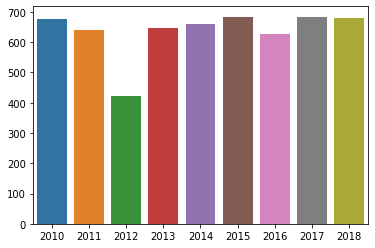

In [60]:
# 2012 had the olympics which removed one month of play mid-season
# I assume the variation in number of games since has to do with number of necessary playoff games
num_of_games_in_season = sns.barplot(x = [i[0] for i in sorted_years_and_num_games],
                                    y = [i[1] for i in sorted_years_and_num_games], ci=None)
# num_of_games_in_season.figure.savefig("../images/number_of_games_per_season.png")

## Approximately how much game time is covered

In [102]:
# total number of games
reg_hours_played = table_info_df[(table_info_df['Column_name'] == 'game_id') & \
                                 (table_info_df['Table'] == 'game')]['Number_of_unique_values']
print(reg_hours_played[0])
# at least 5,718 hours of game play (plus any additional overtime)

0    5718
Name: Number_of_unique_values, dtype: int64


# Time Played plus OT 

In [91]:
game_time = """
            SELECT game_id, COUNT(DISTINCT(period))
            FROM game_plays
            GROUP BY game_id

"""
game_time_query_result = run_query(game_time)
# games_and_periods = [a[0:2] for a in game_time_query_result]
# all_seasons # exclude 0

In [92]:
games_and_periods[0:5]

[(0, 1), (2010020001, 3), (2010020002, 3), (2010020003, 3), (2010020004, 4)]

In [93]:
game_time_query_result[0:4]

[(0, 1), (2010020001, 3), (2010020002, 3), (2010020003, 3)]

In [94]:
ot_game_count = {}
for game, period_count in game_time_query_result:
    if period_count > 3:
        if ot_game_count.get(period_count) == None:
            ot_game_count[period_count] = 1
        else:
            ot_game_count[period_count] += 1

In [95]:
ot_game_count

{4: 1461, 5: 1189, 6: 6}

In [97]:
# number of minutes guarenteed to have been played
total_guarenteed_extra_minutes = 0
for key,value in ot_game_count.items():
    if key == 6:
        total_guarenteed_extra_minutes += value * (60 * 2)
    elif key == 5:
        total_guarenteed_extra_minutes += value * (60 * 2)
total_guarenteed_extra_minutes

143400

In [99]:
total_guarenteed_extra_hours = total_guarenteed_extra_minutes / 60
total_guarenteed_extra_hours

2390.0

In [106]:
# at least 8,108 hours of hockey covered in this data 
minimum_total_hours_played = total_guarenteed_extra_hours + reg_hours_played[0]
minimum_total_hours_played

8108.0

# Total Goals By Period 

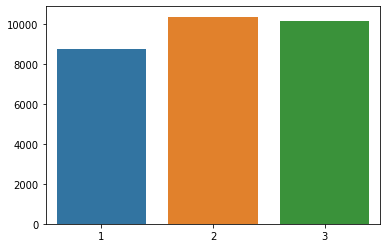

In [7]:
goals_query = get_total_period_sum('goal')
goals_plot = make_barplot_of_variable_by_period(goals_query)

In [21]:
goal_df = get_raw_data('goal')
goal_df.to_csv("../data/goals.csv")

# Total Faceoffs by Period

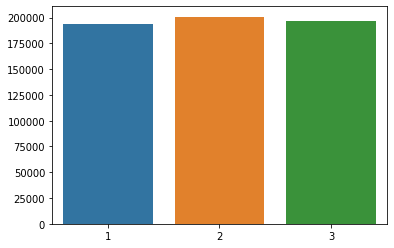

In [28]:
faceoff_query = get_total_period_sum('faceoff')
faceoff_plot = make_barplot_of_variable_by_period(faceoff_query)

In [20]:
faceoff_df = get_raw_data('faceoff')
faceoff_df.to_csv("../data/faceoffs.csv")

# Penalties by Period 

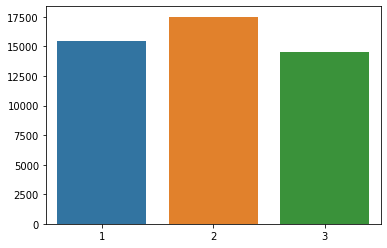

In [29]:
penalty_query = get_total_period_sum('penalty')
penalty_plot = make_barplot_of_variable_by_period(penalty_query)

In [19]:
penalty_df = get_raw_data('penalty')
penalty_df.to_csv("../data/penalties.csv")

# Shots By Period

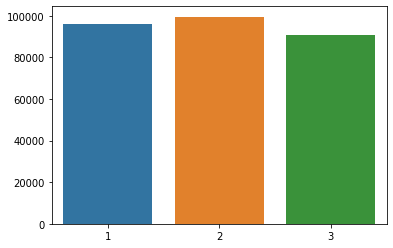

In [31]:
shot_query = get_total_period_sum('shot')
shot_plot = make_barplot_of_variable_by_period(shot_query)
# shot_plot.figure.savefig("../images/number_of_shots_by_period.png")

In [18]:
shot_df = get_raw_data('shot')
shot_df.to_csv("../data/shots.csv")

# Average Shift Length by Period

In [18]:
avg_shift_len_by_period = f"""
            SELECT period, AVG(shift_end - shift_start)
            FROM game_shifts
            WHERE period < 4 AND period > 0
            GROUP BY period
"""
avg_shift_len_by_period_query_result = run_query(avg_shift_len_by_period)

In [25]:
avg_shift_len_by_period = []
for x in avg_shift_len_by_period_query_result:
    avg_shift_len_by_period.append([x[0], float(x[1])])

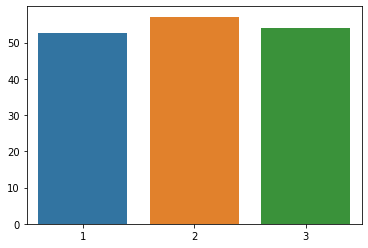

In [27]:
make_barplot_of_variable_by_period(avg_shift_len_by_period)

## D

In [31]:
d_shift_len_by_period = f"""
            SELECT period, shift_end - shift_start, player_info.primaryPosition, game_id
            FROM game_shifts
            INNER JOIN player_info
            ON game_shifts.player_id = player_info.player_id
            WHERE period < 4 
            AND period > 0
            AND player_info.primaryPosition = 'D'
"""
d_shift_len_by_period_query_result = run_query(d_shift_len_by_period)

In [32]:
len(d_shift_len_by_period_query_result)

5225829

In [13]:
all_position_results = []

In [14]:
d_result = get_shift_len_by_position('D')
all_position_results.append(d_result)

## LW

In [15]:
lw_result = get_shift_len_by_position('LW')
all_position_results.append(lw_result)

## RW

In [16]:
rw_result = get_shift_len_by_position('RW')
all_position_results.append(rw_result)

## C

In [17]:
c_result = get_shift_len_by_position('C')
all_position_results.append(c_result)

## Combining data into a list

### Make data into csv 
https://blog.finxter.com/how-to-convert-a-list-of-lists-to-a-csv-file-in-python/

d_shift_len_df = pd.DataFrame(data = d_shift_len_by_period_query_result, columns = ['period', 'shift_len', 'position', 'game_id'])

In [18]:
positions_in_order = ['D', 'LW', "RW", "C"]

In [17]:
for idx, query_result in enumerate(all_position_results):
    position_name = positions_in_order[idx]
    file_name = f"../data/{position_name}_shifts.csv"
    with open(file_name, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerows(query_result)

with open('../data/d_shits.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(d_shift_len_by_period_query_result)

### Combining csvs to one csv

In [20]:
file_name = f"../data/all_positions_shifts.csv"
with open(file_name, 'w', newline='') as f:
    for idx, query_result in enumerate(all_position_results):
        writer = csv.writer(f)
        writer.writerows(query_result)

# Winger shift length by period and home/away team  

In [ ]:
lw_shift_len_by_period_away = f"""
            SELECT period, shift_end - shift_start, player_info.primaryPosition, game_shifts.game_id
            FROM game_shifts
            INNER JOIN player_info
            ON game_shifts.player_id = player_info.player_id
                INNER JOIN game_skater_stats
                ON player_info.player_id = game_skater_stats.player_id
                    INNER JOIN game
                    ON game_skater_stats.team_id = game.away_team_id
            WHERE period < 4 
            AND period > 0
            AND player_info.primaryPosition = 'LW'
"""
lw_shift_len_by_period_away_query_result = run_query(lw_shift_len_by_period_away)

In [ ]:
lw_shift_len_by_period_away_query_result[0:3]